# Performance Analysis

In [1]:
# Include necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Functions Used

In [2]:
# Function for plotting weekly metric
def metric_weekly_plot(aggregated_data, metric):
    # Get the unique genres in the data
    unique_genres = aggregated_data['genre'].unique()

    # Set the number of rows and columns for subplots
    num_rows = 1
    num_cols = len(unique_genres)

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 6))

    # Iterate over the genres and create subplots
    for i, genre in enumerate(unique_genres):
        # Filter the data for the current genre
        genre_data = aggregated_data[aggregated_data['genre'] == genre]
        
        ## Get the company's data
        competitor1_data = genre_data[genre_data['platform'] == 'Competitor1']
        competitor2_data = genre_data[genre_data['platform'] == 'Competitor2']
        voyceme_data = genre_data[genre_data['platform'] == 'VoyceMe']

        # Select the appropriate subplot
        if num_cols > 1:
            ax = axes[i]
        else:
            ax = axes

        # Create the line plot for the current genre
        ax.plot(competitor1_data['week'], competitor1_data[metric], marker='o', label='Competitor1')
        ax.plot(competitor2_data['week'], competitor2_data[metric], marker='o', label='Competitor2')
        ax.plot(voyceme_data['week'], voyceme_data[metric], marker='o', label='VoyceMe')
        ax.set_xlabel('Week')
        ax.set_ylabel(f'{metric}')
        ax.set_title(f'{metric} by Week - {genre}')
        ax.legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()
    
    
# Function for plotting monthly metric
def metric_monthly_plot(aggregated_data_month):
    # Get the unique metrics in the data
    unique_metrics = ['views', 'search_count', 'user_id']

    # Set the number of rows and columns for subplots
    num_rows = 1
    num_cols = len(unique_metrics)

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 6))

    # Iterate over the metrics and create subplots
    for i, metric in enumerate(unique_metrics):

        # Select the appropriate subplot
        if num_cols > 1:
            ax = axes[i]
        else:
            ax = axes
            
        # Plot the barplot
        sns.barplot(x='genre', y=metric, hue='platform', data=aggregated_data_month, ax=ax)
        
        # Set x-axis label, y-axis label, and title
        ax.set_xlabel('Platform')
        ax.set_ylabel(metric)
        ax.set_title(f'Total {metric} by Platform and Genre')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

## Data Preprocessing

In [3]:
## load data
df_users = pd.read_csv('users.csv')
df_transactions = pd.read_csv('transactions.csv')
df_series = pd.read_csv('series.csv')

# Print dataframes to check if there are inconsistencies
print(df_users)
print(df_transactions)
print(df_series)

    user_id user_name            user_email
0         1    user_1    user_1@example.com
1         2    user_2    user_2@example.com
2         3    user_3    user_3@example.com
3         4    user_4    user_4@example.com
4         5    user_5    user_5@example.com
..      ...       ...                   ...
95       96   user_96   user_96@example.com
96       97   user_97   user_97@example.com
97       98   user_98   user_98@example.com
98       99   user_99   user_99@example.com
99      100  user_100  user_100@example.com

[100 rows x 3 columns]
           date  series_id  views  search_count  user_id
0    2023-01-01          1   3424           106       17
1    2023-01-01          2   2594           513       79
2    2023-01-01          3   4428           142       88
3    2023-01-01          4   4000           309       57
4    2023-01-01          5   5807           125       96
..          ...        ...    ...           ...      ...
243  2023-01-31          4   4350           277  

##### Number of unique users

In [4]:
df_transactions['user_id'].nunique()

93

##### Merging tables:

In [5]:
# In order to compare the views and search count of each genre or series Transactions and Series table should be merge
# Joining table Transactions and Series and name it "merge_tran_ser"
merge_tran_ser = df_transactions.merge(df_series, on='series_id', how='left')
merge_tran_ser

,date,series_id,views,search_count,user_id,title,genre,platform
0,2023-01-01,1,3424,106,17,series_1,Fantasy,VoyceMe
1,2023-01-01,2,2594,513,79,series_2,Adventure,VoyceMe
2,2023-01-01,3,4428,142,88,series_3,Sci-Fi,Competitor1
3,2023-01-01,4,4000,309,57,series_4,Fantasy,Competitor2
4,2023-01-01,5,5807,125,96,series_5,Adventure,Competitor1
...,...,...,...,...,...,...,...,...
243,2023-01-31,4,4350,277,6,series_4,Fantasy,Competitor2
244,2023-01-31,5,2580,261,21,series_5,Adventure,Competitor1
245,2023-01-31,6,5179,557,66,series_6,Sci-Fi,VoyceMe
246,2023-01-31,7,3156,710,76,series_7,Historical,Competitor2


In [6]:
# Convert the 'date' column to datetime type 
merge_tran_ser['date'] = pd.to_datetime(merge_tran_ser['date'])

# Check data type of each field in the merged table if date has been converted
merge_tran_ser.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          248 non-null    datetime64[ns]
 1   series_id     248 non-null    int64         
 2   views         248 non-null    int64         
 3   search_count  248 non-null    int64         
 4   user_id       248 non-null    int64         
 5   title         248 non-null    object        
 6   genre         248 non-null    object        
 7   platform      248 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 17.4+ KB


##### Defining weeks

In [7]:
# In order to calculate the weekly trend I have to create a new field on the same merged table
# Extract the day from the 'date' column
merge_tran_ser['day'] = merge_tran_ser['date'].dt.day

# Create the conditions and choices for the new column
conditions = [
    (merge_tran_ser['day'] >= 1) & (merge_tran_ser['day'] <= 7),
    (merge_tran_ser['day'] >= 8) & (merge_tran_ser['day'] <= 14),
    (merge_tran_ser['day'] >= 15) & (merge_tran_ser['day'] <= 21),
    (merge_tran_ser['day'] >= 22) & (merge_tran_ser['day'] <= 28),
    (merge_tran_ser['day'] >= 29)
]
choices = ['week 1', 'week 2', 'week 3', 'week 4', 'week 5']

# Add the new column based on the conditions and choices
merge_tran_ser['week'] = np.select(conditions, choices)

# Print the updated table
merge_tran_ser

,date,series_id,views,search_count,user_id,title,genre,platform,day,week
0,2023-01-01,1,3424,106,17,series_1,Fantasy,VoyceMe,1,week 1
1,2023-01-01,2,2594,513,79,series_2,Adventure,VoyceMe,1,week 1
2,2023-01-01,3,4428,142,88,series_3,Sci-Fi,Competitor1,1,week 1
3,2023-01-01,4,4000,309,57,series_4,Fantasy,Competitor2,1,week 1
4,2023-01-01,5,5807,125,96,series_5,Adventure,Competitor1,1,week 1
...,...,...,...,...,...,...,...,...,...,...
243,2023-01-31,4,4350,277,6,series_4,Fantasy,Competitor2,31,week 5
244,2023-01-31,5,2580,261,21,series_5,Adventure,Competitor1,31,week 5
245,2023-01-31,6,5179,557,66,series_6,Sci-Fi,VoyceMe,31,week 5
246,2023-01-31,7,3156,710,76,series_7,Historical,Competitor2,31,week 5


In [8]:
# Show group by week
merge_tran_ser.groupby('week')['day'].nunique()

week
week 1    7
week 2    7
week 3    7
week 4    7
week 5    3
Name: day, dtype: int64

## Data Visualization

### Weekly Data Visualization

#### Aggregate data to achieve weekly views and search counts

In [9]:
# Group data by 'platform', 'genre', and 'week', and aggregate the required columns
aggregated_data = merge_tran_ser.groupby(['platform', 'genre', 'week']).agg({
    'views': 'sum',
    'search_count': 'sum',
    'user_id': 'nunique'
}).reset_index()

# Create new fields for average views per user and average search count per user
aggregated_data['ave_views_per_user'] = aggregated_data['views'] / aggregated_data['user_id']
aggregated_data['ave_search_count_per_user'] = aggregated_data['search_count'] / aggregated_data['user_id']

# Print the aggregated table
aggregated_data.sort_values(['genre', 'platform'])

,platform,genre,week,views,search_count,user_id,ave_views_per_user,ave_search_count_per_user
0,Competitor1,Adventure,week 1,27879,3916,7,3982.714286,559.428571
1,Competitor1,Adventure,week 2,31333,4236,6,5222.166667,706.000000
2,Competitor1,Adventure,week 3,29390,3325,6,4898.333333,554.166667
3,Competitor1,Adventure,week 4,25822,3132,7,3688.857143,447.428571
4,Competitor1,Adventure,week 5,8451,1126,3,2817.000000,375.333333
20,VoyceMe,Adventure,week 1,23206,4473,7,3315.142857,639.000000
21,VoyceMe,Adventure,week 2,33039,3852,6,5506.500000,642.000000
22,VoyceMe,Adventure,week 3,26731,4075,7,3818.714286,582.142857
23,VoyceMe,Adventure,week 4,27515,4800,7,3930.714286,685.714286
24,VoyceMe,Adventure,week 5,12484,2027,3,4161.333333,675.666667


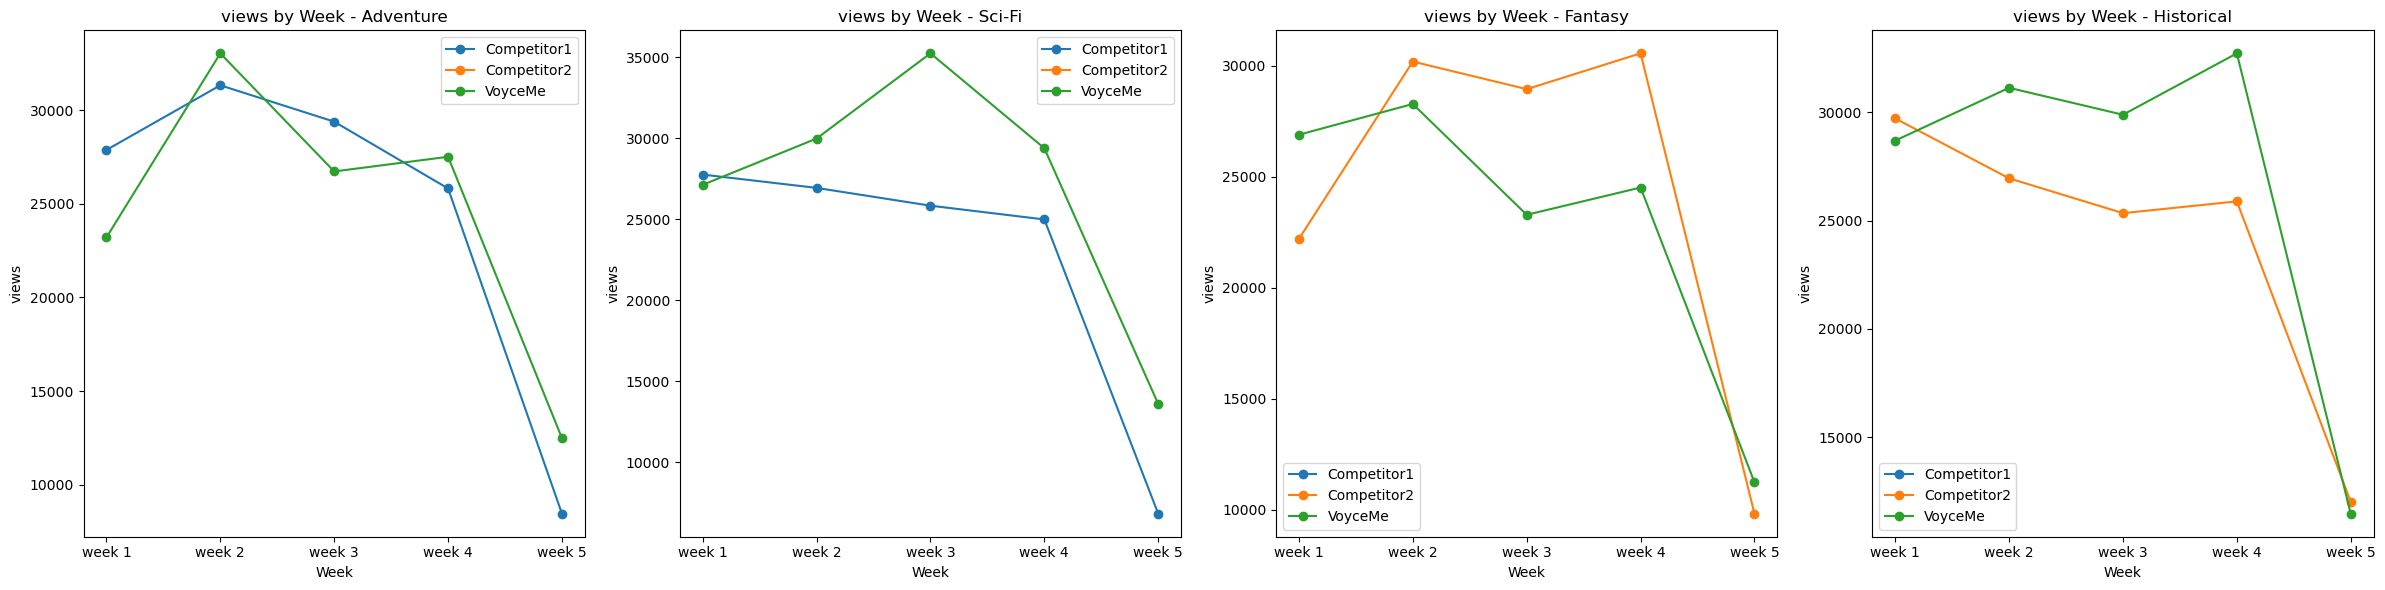

In [10]:
# Show weekly views by platform
metric_weekly_plot(aggregated_data, 'views')

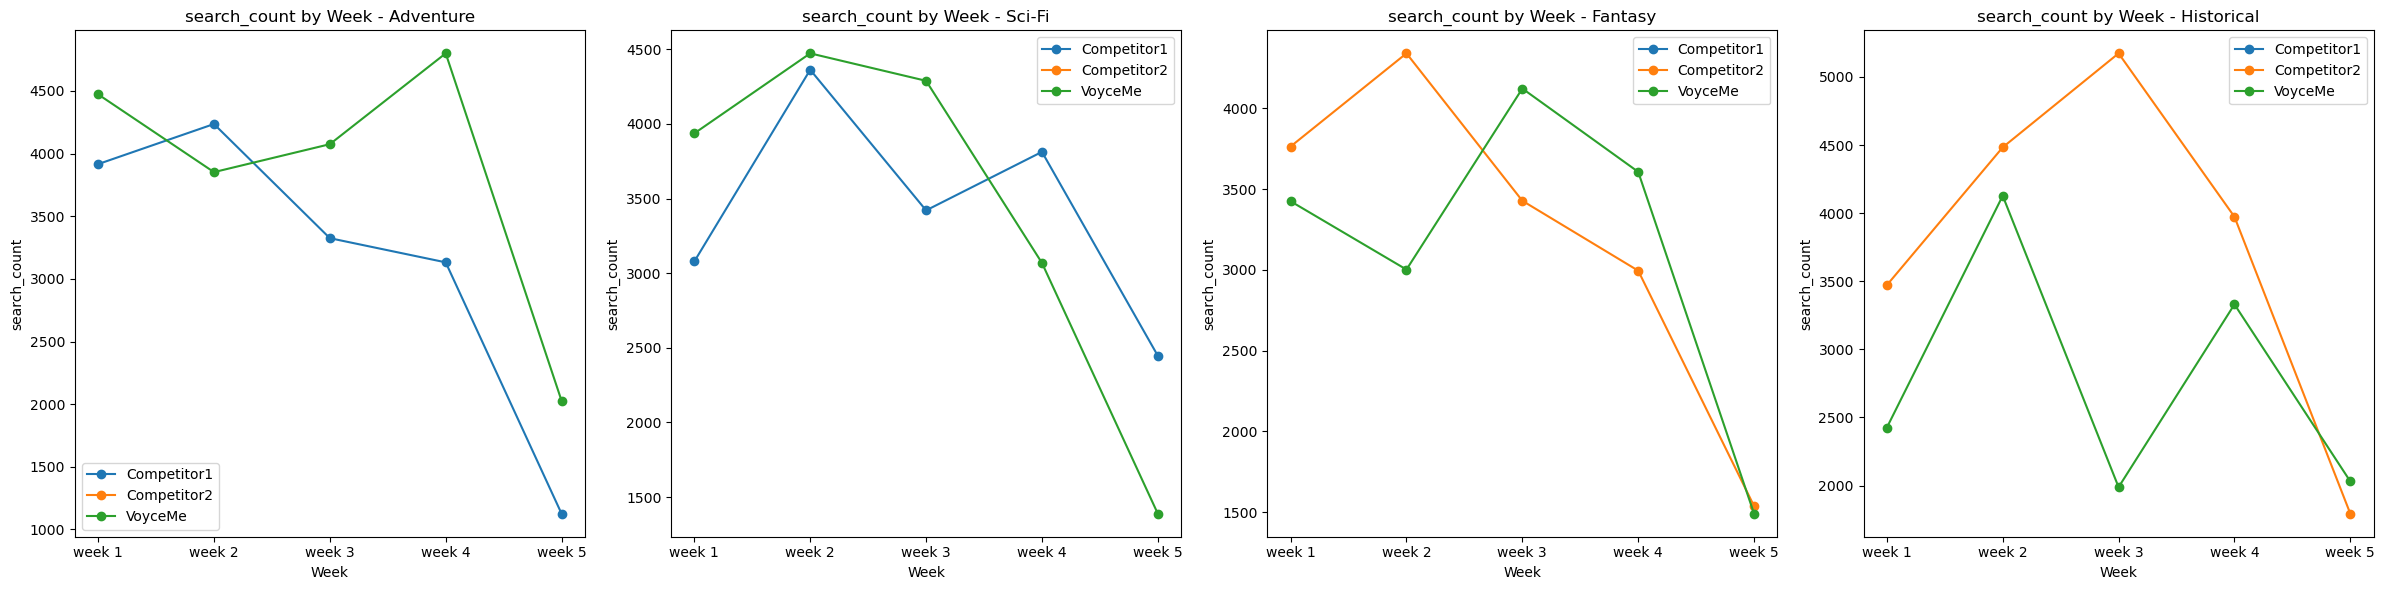

In [11]:
# Show weekly search count by platform
metric_weekly_plot(aggregated_data, 'search_count')

### Monthly Data Visualization

#### Aggregate data to achieve monthly views and search counts

In [12]:
# Group data by 'platform' and 'series_id', and aggregate the required columns
aggregated_data_month = merge_tran_ser.groupby(['platform', 'genre']).agg({
    'views': 'sum',
    'search_count': 'sum',
    'user_id': 'nunique'
}).reset_index()

# Create new field for ave_view_per_user and ave_search_count_per_user
aggregated_data_month['ave_views_per_user'] = aggregated_data_month['views']/aggregated_data_month['user_id']
aggregated_data_month['ave_search_count_per_user'] = aggregated_data_month['search_count']/aggregated_data_month['user_id']

# Print the aggregated table
aggregated_data_month

,platform,genre,views,search_count,user_id,ave_views_per_user,ave_search_count_per_user
0,Competitor1,Adventure,122875,15735,24,5119.791667,655.625000
1,Competitor1,Sci-Fi,112299,17123,28,4010.678571,611.535714
2,Competitor2,Fantasy,121726,16065,28,4347.357143,573.750000
3,Competitor2,Historical,119930,18893,26,4612.692308,726.653846
4,VoyceMe,Adventure,122975,19227,27,4554.629630,712.111111
5,VoyceMe,Fantasy,114216,15647,29,3938.482759,539.551724
6,VoyceMe,Historical,133921,13900,27,4960.037037,514.814815
7,VoyceMe,Sci-Fi,135287,17157,25,5411.480000,686.280000


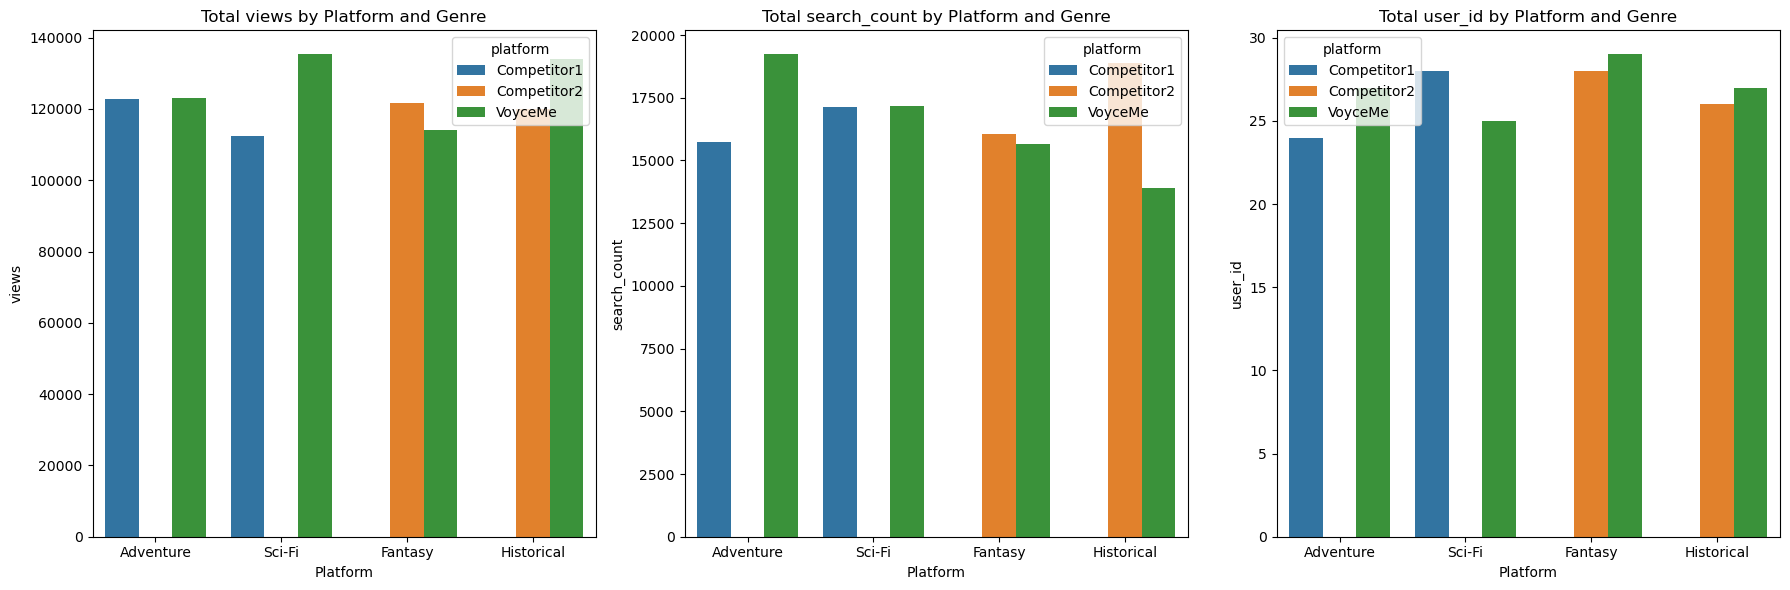

In [13]:
# Show monthly views, search count and user id by competitors
metric_monthly_plot(aggregated_data_month)